# Problem 3

In [2]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd

## Data preparing

In [3]:
data = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], size=10000)
data = pd.DataFrame(data, columns=['X1', 'X2'])
#data

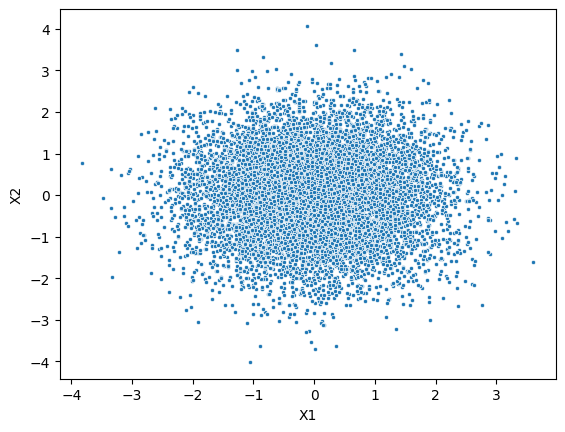

In [4]:
sns.scatterplot(data=data, x='X1', y='X2', marker=".")
plt.show()


## Clustering

In [ ]:
k = 3
iters = list(range(1,100001))
average_norms = []

for _ in iters:
  kmeans = KMeans(n_clusters=k).fit(data)
  centroids = kmeans.cluster_centers_

  norms = np.linalg.norm(centroids, axis=1)
  #print(_)
  average_norms.append(np.mean(norms))

## Cumultative Average

In [ ]:
average_norms = pd.DataFrame({'iters': iters, 'norms': average_norms})
average_norms["cum_avg_norms"] = average_norms["norms"].expanding().mean()
average_norms["diff"] = [average_norms['cum_avg_norms'][0]] +[abs(average_norms["cum_avg_norms"][i] - average_norms["cum_avg_norms"][i-1]) for i in range(1, len(average_norms))]


In [ ]:
average_norms

In [ ]:
sns.lineplot(data=average_norms, x='iters', y='cum_avg_norms')
plt.show()

## Optimal number of iterations

In [ ]:
average_norms.loc[average_norms['diff'] < 10e-9]

In [ ]:
average_norms.loc[average_norms['diff'] < 10e-9].head(100)

In [ ]:
sns.lineplot(data=average_norms.tail(9900), x='iters', y='diff')
plt.show()

The cumulative average stabilizes at $10^{-9}$ only after performing at least more than 100 thousand iterations. Of course, there are earlier equations of the next two cumulative means which are smaller than $10^{-8}$, however this does not mean that the cumulative means stabilize at the level of permissible error equal to $10^{-8}$.


